In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import utils
import preprocessing

In [3]:
params = { 'n_neighbors': range(10,100), 'weights': ('uniform', 'distance'), 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': range(1,3) }
model = KNeighborsClassifier()

### Preprocessing base

In [2]:
df_base = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [4]:
gscv_base = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [5]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(df_base.drop('tiene_alto_valor_adquisitivo',1), df_base['tiene_alto_valor_adquisitivo'], random_state=112)

In [6]:
%%time
gscv_base.fit(X_train_base, y_train_base)
score_base = roc_auc_score(y_test_base, gscv_base.predict_proba(X_test_base)[:,1])

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

CPU times: user 34.5 s, sys: 1.98 s, total: 36.5 s
Wall time: 1h 55min 23s


In [7]:
gscv_base.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}

In [8]:
score_base

0.8941416145178687

In [9]:
print(classification_report(y_test_base,gscv_base.predict(X_test_base)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6182
           1       0.72      0.59      0.65      1959

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



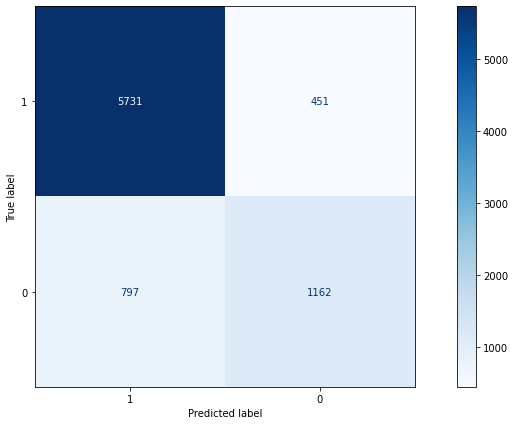

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv_base, X_test_base, y_test_base, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

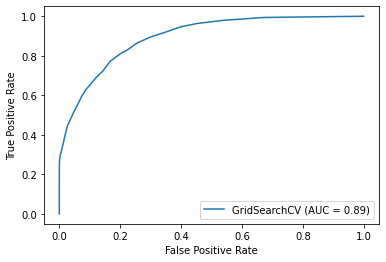

In [11]:
plot_roc_curve(gscv_base, X_test_base, y_test_base)

### Preprocessing Significantes

In [12]:
df_sig, pa_sig = preprocessing.preprocessing_significantes(utils.feature_engineering(utils.get_data()))

In [14]:
gscv_sig = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [15]:
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(df_sig, pa_sig, random_state=112)

In [16]:
%%time
gscv_sig.fit(X_train_sig, y_train_sig)
score_sig = roc_auc_score(y_test_sig, gscv_sig.predict_proba(X_test_sig)[:,1])

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 16

CPU times: user 33.6 s, sys: 2.61 s, total: 36.2 s
Wall time: 4h 25min 24s


In [17]:
gscv_sig.best_params_

{'algorithm': 'brute', 'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}

In [18]:
score_sig

0.8809367098307276

In [19]:
print(classification_report(y_test_sig,gscv_sig.predict(X_test_sig)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6182
           1       0.69      0.54      0.61      1959

    accuracy                           0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.82      0.83      0.82      8141



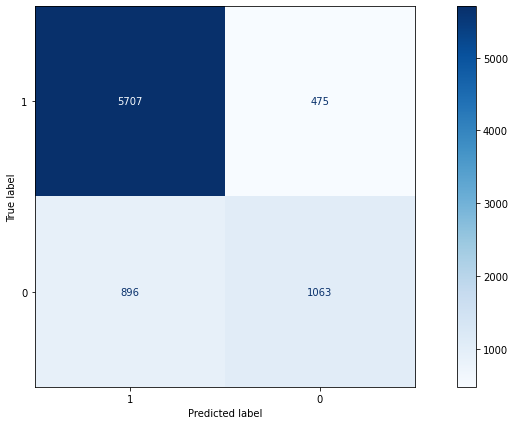

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv_sig, X_test_sig, y_test_sig, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

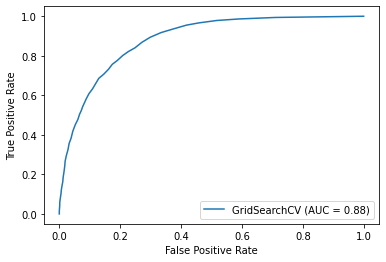

In [21]:
plot_roc_curve(gscv_sig, X_test_sig, y_test_sig)